## Lab 2_2 Double layer NN without nn.Linear (fully connected module)

In [104]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
# import pandas as pd

In [105]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [106]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

In [107]:
# blob_df = pd.DataFrame(data=)

In [108]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

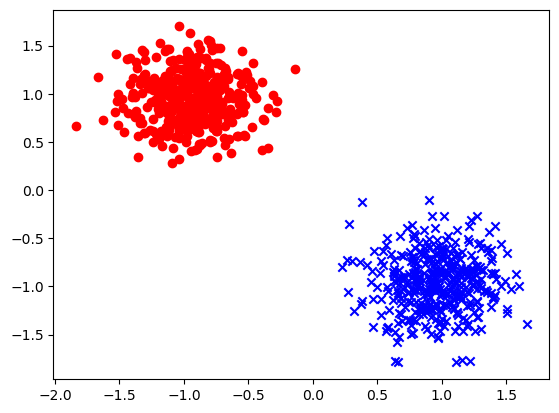

In [110]:
plt.scatter(X_train[y_train == 0, 0].reshape(-1,1), X_train[y_train == 0, 1].reshape(-1,1), color='red', label='Class 0', marker='o')
plt.scatter(X_train[y_train == 1, 0].reshape(-1,1), X_train[y_train == 1, 1].reshape(-1,1), color='blue', label='Class 1', marker='x')
plt.show()

In [111]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [112]:
# initialize the parameters manually
input_dim = X_train_tensor.shape[1]
hidden_dim = 16
output_dim = 2 # binary class classification

In [113]:
W1 = torch.randn(input_dim, hidden_dim, dtype=torch.float32, requires_grad=True)
b1 = torch.zeros(hidden_dim, dtype=torch.float32, requires_grad=True)
W2 = torch.randn(hidden_dim, output_dim, dtype=torch.float32, requires_grad=True)
b2 = torch.zeros(output_dim, dtype=torch.float32, requires_grad=True)

In [114]:
def relu(x):
    return torch.maximum(x,torch.zeros_like(x))

In [115]:
def softmax(x):
    e_x = torch.exp(x - torch.max(x, dim=-1, keepdim=True).values)  # For numerical stability
    return e_x / torch.sum(e_x, dim=-1, keepdim=True)  # Sum along the last dimension (classes)

In [116]:
def forward(X):
    #input to hideen layer
    Z1 = torch.matmul(X,W1) + b1
    A1 = relu(Z1)

    # hidden to output layer
    Z2 = torch.matmul(A1, W2) + b2
    A2 = softmax(Z2)

    return A2


In [117]:
import torch.nn.functional as F

def cross_entropy(pred, truth):
  # One-hot encode the truth labels
  truth_onehot = F.one_hot(truth, num_classes=output_dim).float()
  # Calculate cross-entropy loss
  loss = -torch.mean(torch.sum(truth_onehot * torch.log(pred), dim=1))
  return loss

In [118]:
epoch = 100
lr = 0.1

for ep in range(epoch):
    # Forward pass
    y_pred = forward(X_train_tensor)
    
    # Compute loss
    loss = cross_entropy(y_pred, y_train_tensor)
    
    # Backward pass
    loss.backward()

    # Update weights and biases using gradients (outside of `torch.no_grad()`)
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad  # Fix: b1 gradients should be used for b1
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad  # Fix: b2 gradients should be used for b2

        # Zero gradients after updating weights and biases
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    # Optional: print loss every 10 epochs
    if (ep + 1) % 10 == 0:
        print(f'Epoch [{ep+1}/{epoch}], Loss: {loss.item()}')


Epoch [10/100], Loss: 0.05680207163095474
Epoch [20/100], Loss: 0.028162073343992233
Epoch [30/100], Loss: 0.01875614933669567
Epoch [40/100], Loss: 0.014076604507863522
Epoch [50/100], Loss: 0.011271767318248749
Epoch [60/100], Loss: 0.009405359625816345
Epoch [70/100], Loss: 0.008073074743151665
Epoch [80/100], Loss: 0.007073984947055578
Epoch [90/100], Loss: 0.006296700797975063
Epoch [100/100], Loss: 0.005674394778907299


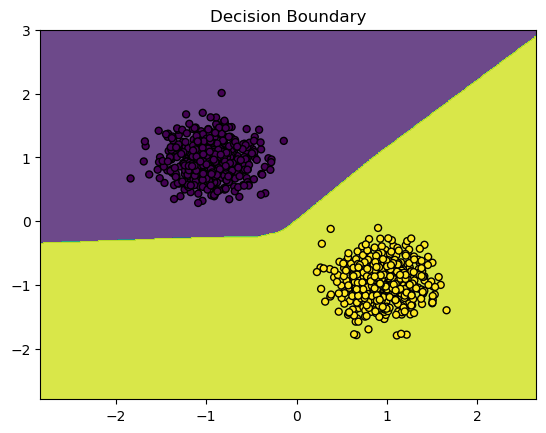

In [119]:
# Visualization (Decision Boundary)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
y_pred_grid = forward(grid)
_, predicted_labels_grid = torch.max(y_pred_grid, 1)
predicted_grid = predicted_labels_grid.reshape(xx.shape)

plt.contourf(xx, yy, predicted_grid, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25)
plt.title('Decision Boundary')
plt.show()